# **NLP Sentiment Analysis for AMAZON Reviews**

-By Aishwarya Pagadala [862324772]  and SriRaksha Srirangapatna Arun [862325113]

**PROBLEM STATEMENT**

One of the popular application of sentiment analysis is predicting sentiment of customer reviews. With the help of Sentiment Analysis, we can determine whether the text is showing positive or negative sentiment and this is done using both NLP and machine learning. 

For this project, We created a machine learning model which will predict if the review is positive or negative, using amazon’s food review dataset available at kaggle and also for any new given customer review.

**IMPLEMENTATION**

Firstly, We imported the following libraries for text pre-processing.
- We imported "bs4" for Removing HTML tags from the text.
- Relibrary "re" will help in Removing Alphanumeric Text and Special Characters.
- "nltk" library is useful to perform Tokenization, Removing Stopwords, and Lemmatization.

In [1]:
# Import the required libraries
import pandas as pd
from bs4 import BeautifulSoup
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from tqdm import tqdm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


 Then, we imported the dataset. We are using amazon’s food review dataset available at kaggle.

In [2]:
# Import the dataset "Reviews"
reviews_dataset = pd.read_csv('/content/drive/MyDrive/Reviews.csv',nrows = 10000)

Removing duplicate entries

In [3]:
# Dropping the dups in dataset
reviews_dataset = reviews_dataset.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)


Removing HTML tags

In [4]:
def removeHTMLTags(reviewData):
    data = BeautifulSoup(reviewData, 'lxml')
    return data.get_text()

Removing words with apostrophe and replacing with actual words

In [5]:
def removeApostrophe(reviewData):
    reviewsDataPhrase = re.sub(r"won't", "will not", reviewData)
    reviewsDataPhrase = re.sub(r"can\'t", "can not", reviewData)
    reviewsDataPhrase = re.sub(r"n\'t", " not", reviewData)
    reviewsDataPhrase = re.sub(r"\'re", " are", reviewData)
    reviewsDataPhrase = re.sub(r"\'s", " is", reviewData)
    reviewsDataPhrase = re.sub(r"\'d", " would", reviewData)
    reviewsDataPhrase = re.sub(r"\'ll", " will", reviewData)
    reviewsDataPhrase = re.sub(r"\'t", " not", reviewData)
    reviewsDataPhrase = re.sub(r"\'ve", " have", reviewData)
    reviewsDataPhrase = re.sub(r"\'m", " am", reviewData)
    return reviewsDataPhrase

Removing Alpha Numeric words

In [6]:
def removeAlphaNumericWords(reviews_data):
     return re.sub("\S*\d\S*", "", reviews_data).strip()

Removing special characters

In [7]:
 def removeSpecialChars(reviews_data):
     return re.sub('[^a-zA-Z]', ' ', reviews_data)

We created a doTextCleaning() function, which will use the above-created methods as well as perform Tokenization, Removing Stopwords, Lowercasing, and Lemmatization

In [8]:
def performTextCleaning(reviews_data):
    reviews_data = removeHTMLTags(reviews_data)
    reviews_data = removeApostrophe(reviews_data)
    reviews_data = removeAlphaNumericWords(reviews_data)
    reviews_data = removeSpecialChars(reviews_data) 
    # Lower casing
    reviews_data = reviews_data.lower()  
    #Tokenization
    reviews_data = reviews_data.split()
    #Removing Stopwords and Lemmatization
    lemmatizer = WordNetLemmatizer()
    reviews_data = [lemmatizer.lemmatize(word, 'v') for word in reviews_data if not word in set(stopwords.words('english'))]
    reviews_data = " ".join(reviews_data)    
    return reviews_data

In [9]:
def scorePartition(num):
    if num < 3:
        return 0
    return 1

Here, we map posivitive or negetive score to 1 or 0 respectively, and updating the dataset

In [10]:
# Generalizing the score
actualScore = reviews_dataset['Score']
positiveNegative = actualScore.map(scorePartition) 
reviews_dataset['Score'] = positiveNegative

**TEXT PREPOSSESING**


Here, we will create document corpus on which we will apply Bag of words model. The document corpus is a collection of all reviews in the document, where the document is our dataset.

In the below code we created corpus array and we have applied for loop on our dataset. In the for loop we will call performTextCleaning() function, which will return the cleaned text review. 

Once we receive the cleaned and preprocessed text, we will append it into the corpus array.

In [11]:
# creating the document corpus
corpus = []   
for index, row in tqdm(reviews_dataset.iterrows()):
    reviewdata = performTextCleaning(row['Text'])
    corpus.append(reviewdata)

9515it [01:58, 80.44it/s]


ADVANCED TEXT PREPROCESSING

The next step is to perform Advance text preprocessing on the reviews, which will convert the reviews into Numeric Vectors and using that we can create our Machine Learning model.

Using the document corpus we create "Bag-of-Words" model along with applying Tri-grams. Bag of Word model creates a set of words or in other words, it creates a dictionary of words from the single document. Then it converts that dictionary of words into a vector, where each word is a separate dimension.

Note: Grams(Tri-gram) are useful in creating the word dimensions from the document corpus.Here, we used Tri-grams to create word dimension.

First we import the CountVectorizer transform from scikit library.

In [12]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

Here, We are creating the transform using CountVectorizer with tri-grams.
Note: We can specify which grams we want to use ngram_range parameter, for tri-gram usengram_range=(1,3).

In [13]:
#Creating a tranform
countVectors = CountVectorizer(ngram_range=(1,3), max_features = 5000)
X = countVectors.fit_transform(corpus).toarray()
y = reviews_dataset.iloc[:,6].values


**NLP sentiment analysis Machine learning model**

In this project, we used the Naive Bayes classification model.

As of now, we have two vectors i.e. X and Y.So, firstly to create a machine learning model is that splitting the dataset into the Training set and Test set. Here, we are splitting our data as 80% training and 20% testing sets.
 
Using the training set we will train our Naive Bayes classification model. Then With the test set can check the performance of a Naive Bayes classification model.

Below, we imported the train_test_split API to split the vectors into test and training sets.

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

**Gaussian Naive Bayes classification model**

Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data.

The Gaussian or Normal Distribution depends on 2 parameters of a series — The mean and the standard Deviation. Knowing these 2 parameters of the series we can find it’s distribution function.
The mean value of the series and its standard deviation help find out the probability that the value x will occur.

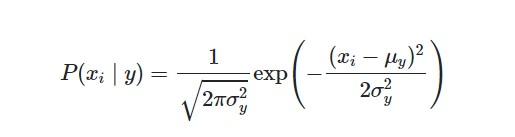

Here, we are implementing Gaussian Naive Bayes classification model from scratch.

The implementation details are as follows:
1. Firstly, we import all the required dependencies- NumPy, pandas, and math library.
2. We created a class "GaussianNaiveBayesClassifier" that holds the implementation of the algorithm. The first function "separate_by_classes"  will separate our data set by class. It separates the dataset into classes to calculate the mean and standard deviations for every column, separately for every class.
3. In the "fit" function, we calculate for every class the mean and the standard deviation for every column.
4. The Gaussian Distribution Function: The "calculate_probability" function calculates using the mean and standard deviation of a series the probability that a function will occur in a series.
5. In the "predict_function", it returns a dictionary with probabilities of the sample to belong to a class.
6. In the predict function, we predict the class of a sample by taking max probability for each sample

In [15]:
import numpy as np
import pandas as pd
import math

class GaussianNaiveBayesClassifier:
    def separate_by_classes(self, X, y):
        # This function separates our dataset in subdatasets by classes
        self.classes = np.unique(y)
        classes_index = {}
        subdatasets = {}
        clss, counts = np.unique(y, return_counts=True)
        self.class_freq = dict(zip(clss, counts))
        print(self.class_freq)
        for class_type in self.classes:
            classes_index[class_type] = np.argwhere(y==class_type)
            subdatasets[class_type] = X[classes_index[class_type], :]
            self.class_freq[class_type] = self.class_freq[class_type]/sum(list(self.class_freq.values()))
        return subdatasets
    def fit(self, X, y):
        # The fitting function 
        separated_X = self.separate_by_classes(X, y)
        self.means = {}
        self.std = {}
        for class_type in self.classes:
            # Here we calculate the mean and the standart deviation from datasets
            self.means[class_type] = np.mean(separated_X[class_type], axis=0)[0]
            self.std[class_type] = np.std(separated_X[class_type], axis=0)[0]
    def calculate_probability(self, x, mean, stdev):
        #This function calculates the class probability using gaussian distribution
        exponent = math.exp(-((x - mean) ** 2 / (2 * stdev ** 2)))
        return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent
    def predict_proba(self, X):
        # This function predicts the probability for every class
        self.class_prob = {clss:math.log(self.class_freq[clss], math.e) for clss in self.classes}
        for clss in self.classes:
            for i in range(len(self.means)):
                self.class_prob[clss]+=math.log(self.calculate_probability(X[i], self.means[clss][i], self.std[clss][i]), math.e)
        self.class_prob = {clss: math.e**self.class_prob[clss] for clss in self.class_prob}
        return self.class_prob
    def predict(self, X):
        # This funtion predicts the class of a sample
        pred = []
        for x in X:
            pred_class = None
            max_prob = 0
            for clss, prob in self.predict_proba(x).items():
                if prob>max_prob:
                    max_prob = prob
                    pred_class = clss
            pred.append(pred_class)
        return pred

In [16]:
gnbClassifier = GaussianNaiveBayesClassifier()

Training our model

In [17]:
gnbClassifier.fit(X_train, y_train)

{0: 1141, 1: 6471}


Predicting our test set results

In [18]:
# Predicting the Test set results
y_pred = gnbClassifier.predict(X_test)

Building Confusion Matrix

In [19]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)

In [20]:
print("Confusion Matrix :","\n", cf_matrix)

Confusion Matrix : 
 [[   3  289]
 [  58 1553]]


Visualizing the results with HeatMap

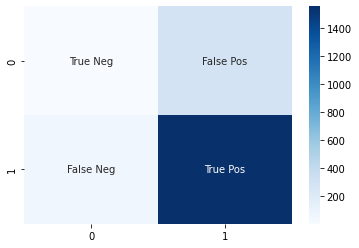

In [21]:
import seaborn as sns
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

Calculating Accuracy

In [22]:
accuracy = (cf_matrix[0][0] + cf_matrix[1][1])/(cf_matrix[0][0]+ cf_matrix[0][1] + cf_matrix[1][0]+ cf_matrix[1][1])
print("Accuracy is :", accuracy)

Accuracy is : 0.8176563321071991


Calculating Recall

In [23]:
 precision = (cf_matrix[1][1])/(cf_matrix[0][1] + cf_matrix[1][1])
print("Recall/Precision is :", precision)

Recall/Precision is : 0.8431053203040174


Using our model to predict a new given customer review

In [24]:
#Predict sentiment for new Review
def predictNewReview():
    predNewReview = input("Type the Review: ")
    
    if predNewReview =='':
        print('Invalid Review')  
    else:
        predNewReview = performTextCleaning(predNewReview)
        reviewVector = countVectors.transform([predNewReview]).toarray()  
        prediction =  gnbClassifier.predict(reviewVector)
        if prediction[0] == 1:
            print( "Positive Review" )
        else:        
            print( "Negative Review")

Results:

In [25]:
predictNewReview()

Type the Review: The food was amazing
Positive Review
